### Importing libraries

In [349]:
import pandas as pd #data manipulation and analysis
import numpy as np #numerical and mathematical operations
import seaborn as sns


import matplotlib as plt
from matplotlib import pyplot
import math
import collections

In [145]:
#Reading from a CSV file

import_cars=pd.read_csv('german_auto.csv')

In [146]:
import os
os.listdir()

['german_auto.csv', 'Deutsch autocars analysis.ipynb', '.ipynb_checkpoints']

In [147]:
#check the first 5 colums data
import_cars.head(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00,2011


In [148]:
#check the last 5 colums data
import_cars.tail(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021


In [149]:
#check missing colums
import_cars.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

From the result above we have missing colums in model,fuel and hp

In [150]:
#to check for the cars data types
import_cars.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

from the above we  we intergers,object(strings),float(decimals)

### Data Cleaning

In [151]:

pd.set_option('display.float_format',lambda x:'%.2F' % x)
import_cars[['mileage','price','hp']].describe()

,mileage,price,hp
count,46405.00,46405.00,46376.00
mean,71177.86,16572.34,132.99
std,62625.31,19304.70,75.45
min,0.00,1100.00,1.00
25%,19800.00,7490.00,86.00
50%,60000.00,10999.00,116.00
75%,105000.00,19490.00,150.00
max,1111111.00,1199900.00,850.00


The above formated all to two decimal places

In [152]:
import_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


From the result above we have missing colums are model,fuel and hp as all others are 46405

In [153]:
import_cars.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

From the result above we have missing colums in model,fuel and hp

In [154]:
import_cars.gear

0        Manual
1        Manual
2        Manual
3        Manual
4        Manual
          ...  
46400    Manual
46401    Manual
46402    Manual
46403    Manual
46404    Manual
Name: gear, Length: 46405, dtype: object

In [155]:
import_cars.describe()

,mileage,price,hp,year
count,46405.00,46405.00,46376.00,46405.00
mean,71177.86,16572.34,132.99,2016.01
std,62625.31,19304.70,75.45,3.16
min,0.00,1100.00,1.00,2011.00
25%,19800.00,7490.00,86.00,2013.00
50%,60000.00,10999.00,116.00,2016.00
75%,105000.00,19490.00,150.00,2019.00
max,1111111.00,1199900.00,850.00,2021.00


In [156]:
import_cars.count()

mileage      46405
make         46405
model        46262
fuel         46405
gear         46223
offerType    46405
price        46405
hp           46376
year         46405
dtype: int64

In [157]:
#to check for the cars data types
import_cars.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [158]:
import_cars["gear"].value_counts()

Manual            30380
Automatic         15787
Semi-automatic       56
Name: gear, dtype: int64

<h2><b>Data refining</b></h2>

In [159]:
import_cars.loc[import_cars['hp'].isna()]


,mileage,make,model,fuel,gear,offerType,price,hp,year
482,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
2368,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
5552,129375,Peugeot,207,Gasoline,Manual,Used,5950,NaN,2013
5760,129375,Peugeot,207,Gasoline,Manual,Used,5950,NaN,2013
8892,71113,Opel,Corsa,Gasoline,Manual,Used,5666,NaN,2012
9264,5,Aixam,NaN,Electric,Automatic,Pre-registered,22180,NaN,2021
10575,72109,Ford,Fiesta,Gasoline,Manual,Used,6222,NaN,2013
10779,71113,Opel,Corsa,Gasoline,Manual,Used,5666,NaN,2012
10782,72109,Ford,Fiesta,Gasoline,Manual,Used,6222,NaN,2013
12000,139,Renault,Twingo,Electric,Automatic,Demonstration,15990,NaN,2021


In [160]:
import_cars.loc[import_cars['hp'].isna()].count()

mileage      29
make         29
model        26
fuel         29
gear         26
offerType    29
price        29
hp            0
year         29
dtype: int64

In [161]:
#replace the 29 missing value of HP with the mean value colum wise
average_HP=import_cars['hp'].mean(axis=0)
average_HP

132.99098671726756

In [162]:
import_cars['hp'].replace(np.nan,average_HP,inplace=True)
#Check if the missing values has been replaced by averages of Hp
import_cars['hp'].isnull().sum()

0

In [163]:
#dropping model column with missing value 

import_cars.loc[import_cars['model'].isna()]



,mileage,make,model,fuel,gear,offerType,price,hp,year
365,3500,Others,NaN,Electric,Manual,Used,5500,38.00,2018
2001,2900,Others,NaN,Electric,Automatic,Used,7900,5.00,2018
2009,60866,Opel,NaN,Gasoline,Manual,Used,12290,82.00,2019
2019,3550,Opel,NaN,Gasoline,Manual,Used,15800,110.00,2019
2496,3000,Audi,NaN,Electric,Automatic,Demonstration,172450,598.00,2021
...,...,...,...,...,...,...,...,...,...
46074,1,Others,NaN,Gasoline,Manual,Pre-registered,23990,150.00,2021
46102,1,Others,NaN,Gasoline,Manual,Pre-registered,23990,150.00,2021
46114,35,Kia,NaN,Electric/Gasoline,Automatic,Pre-registered,30440,141.00,2021
46120,35,Kia,NaN,Electric,Automatic,Pre-registered,32440,204.00,2021


In [164]:
#remove colum with nun value in the model colum

import_cars.dropna(subset = ["model"], axis = 0, inplace = True)
import_cars.reset_index(drop = True, inplace = True)

In [165]:
import_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46262 entries, 0 to 46261
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46262 non-null  int64  
 1   make       46262 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46262 non-null  object 
 4   gear       46095 non-null  object 
 5   offerType  46262 non-null  object 
 6   price      46262 non-null  int64  
 7   hp         46262 non-null  float64
 8   year       46262 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


from the above hp has been clean and we have gear left to drop null value

In [166]:
#we would use max to replace missing value beacuase its object data type
import_cars['gear'].value_counts().idxmax()

'Manual'

from the above 'Manual' car is the highest

In [167]:
import_cars['gear'].replace(np.nan,'Manual',inplace=True)

In [168]:
import_cars.describe()

,mileage,price,hp,year
count,46262.00,46262.00,46262.00,46262.00
mean,71259.64,16544.75,132.88,2016.01
std,62635.20,19253.64,75.02,3.15
min,0.00,1100.00,1.00,2011.00
25%,19900.00,7490.00,86.00,2013.00
50%,60000.00,10999.00,116.00,2016.00
75%,105000.00,19483.75,150.00,2019.00
max,1111111.00,1199900.00,850.00,2021.00


In [169]:
#from the desceiptive statistics There is an outlier in the value of hp,might be due to error,we need to fix it

import_cars.loc[import_cars['hp'] == 1]

,mileage,make,model,fuel,gear,offerType,price,hp,year
9091,167000,Renault,Megane,Diesel,Manual,Used,5450,1.00,2012
36106,302000,Toyota,Prius+,Electric/Gasoline,Manual,Used,7985,1.00,2013


we need to find the average of the model=megane in respect to hp

In [173]:
import_cars[['hp']].loc[(import_cars['model']=='Megane') & (import_cars['year']==2012)].mean()

hp   110.61
dtype: float64

The hp average for model=megane is 110.61

In [176]:
import_cars[['year', 'hp']].loc[(import_cars['model'] == 'Prius')].mean()



year   2013.69
hp      107.21
dtype: float64

The hp average for model=prius is 107.21

replace hp 1 values with 110.61 and 107.21 respectively

In [255]:
import_cars.loc[9091, 'hp'] = 110.61
import_cars.loc[36106, 'hp'] = 107.21

In [256]:
import_cars.loc[import_cars['hp'] == 110.61]

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,hp_bin,bin_group
9091,167000,Renault,Megane,Diesel,Manual,Used,5450,110.61,2012,meduim,100-200 hp,meduim


In [257]:
import_cars.loc[import_cars['hp'] == 107.21]

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,hp_bin,bin_group
36106,302000,Toyota,Prius+,Electric/Gasoline,Manual,Used,7985,107.21,2013,meduim,100-200 hp,meduim


In [258]:
import_cars.loc[(import_cars['model'] == 'Megane') & (import_cars['year'] == 2012)]


,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,hp_bin,bin_group
3805,170000,Renault,Megane,Gasoline,Manual,Used,5000,131.00,2012,meduim,100-200 hp,meduim
4021,112800,Renault,Megane,Gasoline,Manual,Used,4800,101.00,2012,meduim,100-200 hp,meduim
4026,72450,Renault,Megane,Gasoline,Manual,Used,4888,116.00,2012,meduim,100-200 hp,meduim
7187,110000,Renault,Megane,Gasoline,Manual,Used,5499,101.00,2012,meduim,100-200 hp,meduim
9091,167000,Renault,Megane,Diesel,Manual,Used,5450,110.61,2012,meduim,100-200 hp,meduim
9470,101111,Renault,Megane,Gasoline,Manual,Used,5990,110.00,2012,meduim,100-200 hp,meduim
9476,148401,Renault,Megane,Diesel,Manual,Used,5990,106.00,2012,meduim,100-200 hp,meduim
11163,111000,Renault,Megane,Diesel,Manual,Used,5999,106.00,2012,meduim,100-200 hp,meduim
11574,101362,Renault,Megane,Gasoline,Automatic,Used,8750,140.00,2012,meduim,100-200 hp,meduim
12451,124000,Renault,Megane,Diesel,Manual,Used,5750,106.00,2012,meduim,100-200 hp,meduim


In [259]:
import_cars[['mileage', 'price', 'hp']].describe()

,mileage,price,hp
count,46262.00,46262.00,46262.00
mean,71259.64,16544.75,132.89
std,62635.20,19253.64,75.01
min,0.00,1100.00,5.00
25%,19900.00,7490.00,86.00
50%,60000.00,10999.00,116.00
75%,105000.00,19483.75,150.00
max,1111111.00,1199900.00,850.00


In [260]:
import_cars.loc[import_cars['hp'] == 850]

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,hp_bin,bin_group
43013,9234,Mercedes-Benz,G 63 AMG,Gasoline,Automatic,Used,216619,850.00,2019,highest,400 + hp,highest


In [261]:
import_cars.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
hp-bin       0
hp_bin       0
bin_group    0
dtype: int64

In [262]:
# set year column datatype as object 

import_cars[["year"]] = import_cars[["year"]].astype('object')


# DATA VISUALIZATION

Let's explore how Horsepower is distributed among all cars:

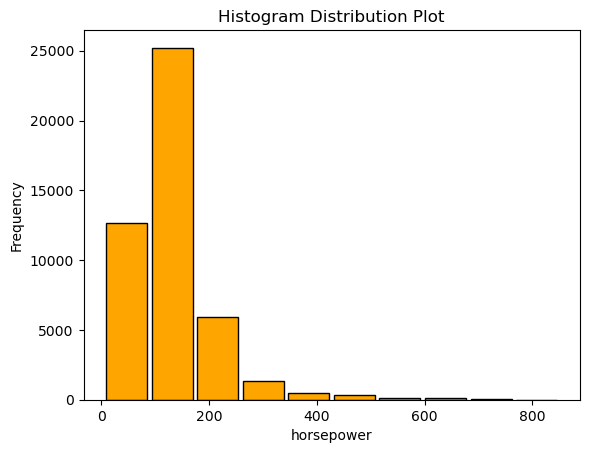

In [263]:

plt.pyplot.hist(import_cars['hp'],edgecolor='black',color='orange',rwidth=0.9)

# add labels and title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('Frequency')
plt.pyplot.title('Histogram Distribution Plot')

# display the plot
plt.pyplot.show()

Based on the descriptive statistics, a majority of cars (75%) have horsepower less than 150, while 25% of cars have horsepower ranging from 150 to 850. Notably, the presence of significant outliers is observed in the data.

In [264]:
# divide cars into 4 groups of horsepower

groups = np.array([1., 100., 200., 400., 850.])
group_names = ['low', 'meduim', 'high', 'highest']
import_cars['bin_group'] = pd.cut(import_cars['hp'], groups, labels = group_names, include_lowest = True)
import_cars[['hp', 'bin_group']].head(10)


,hp,bin_group
0,116.00,meduim
1,122.00,meduim
2,160.00,meduim
3,110.00,meduim
4,156.00,meduim
5,99.00,low
6,131.00,meduim
7,116.00,meduim
8,150.00,meduim
9,86.00,low


In [265]:

import_cars.loc[import_cars['bin_group'] == "low"]

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,hp_bin,bin_group
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.00,2011,low,5-100 hp,low
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.00,2011,low,5-100 hp,low
15,72000,Volkswagen,Polo,Gasoline,Manual,Used,6999,60.00,2011,low,5-100 hp,low
20,44800,Kia,Picanto,Gasoline,Automatic,Used,7850,86.00,2012,low,5-100 hp,low
32,128000,MINI,One D Countryman,Diesel,Manual,Used,7990,90.00,2012,low,5-100 hp,low
...,...,...,...,...,...,...,...,...,...,...,...,...
46257,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,low,5-100 hp,low
46258,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,low,5-100 hp,low
46259,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,low,5-100 hp,low
46260,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,low,5-100 hp,low


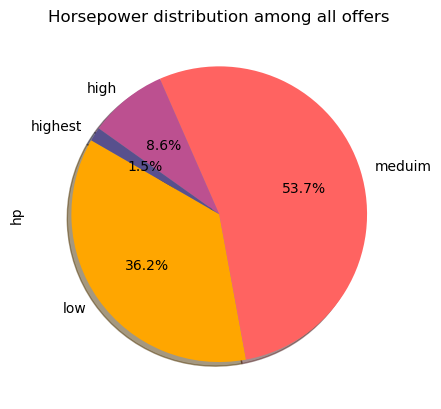

In [273]:
pie1 = import_cars.groupby(['bin_group']).count()
plot = pie1.plot.pie(y = 'hp', title="Horsepower distribution among all offers", legend=False,
                   autopct='%1.1f%%', colors =['#ffa600', '#ff6361', '#bc5090', '#58508d'],
                   shadow=True, startangle=150)



In [270]:
# Let's make price bins and a pie chart 

groups1 = np.array([1., 10000., 20000., 50000., 2000000.])
group_names1 = ['< 10000€', '10000-20000€', '20000-50000€', '50000€ +',]
import_cars['price-bin'] = pd.cut(import_cars['price'], groups1, labels = group_names1, include_lowest = True)
import_cars[['price', 'price-bin']].head(10)

,price,price-bin
0,6800,< 10000€
1,6877,< 10000€
2,6900,< 10000€
3,6950,< 10000€
4,6950,< 10000€
5,6950,< 10000€
6,6970,< 10000€
7,6972,< 10000€
8,6980,< 10000€
9,6990,< 10000€


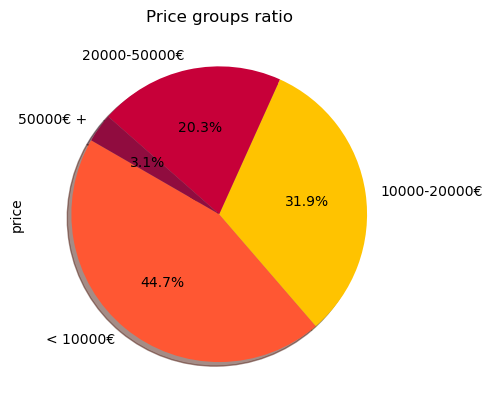

In [274]:
pie_price_bins = import_cars.groupby(['price-bin']).count()
plot = pie_price_bins.plot.pie(y = 'price', title="Price groups ratio", legend=False,
                   autopct='%1.1f%%',colors=['#FF5733', '#FFC300', '#C70039', '#900C3F'],
                   shadow=True, startangle=150)



In [280]:
import_cars['price-bin'].value_counts(normalize=True) * 100


< 10000€       44.67
10000-20000€   31.93
20000-50000€   20.26
50000€ +        3.15
Name: price-bin, dtype: float64

44.67% of all Auto offers have prices less than 10,000 euros.

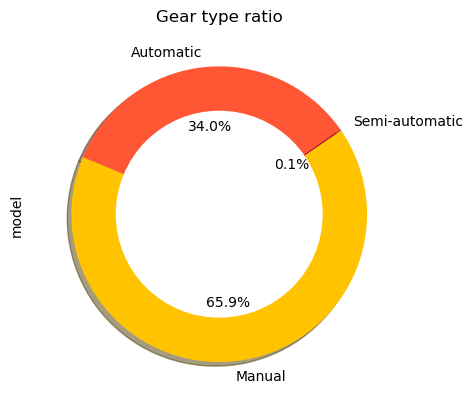

In [282]:
# Checking for  gear type ratio

import matplotlib.pyplot as plt

pie_gear = import_cars.groupby(['gear']).count()
plot_gear = pie_gear.plot.pie(y = 'model', title="Gear type ratio", legend=False,
                   autopct='%1.1f%%', colors = ['#FF5733', '#FFC300', '#C70039'],
                   shadow=True, startangle=35)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Add circle to the pie chart
fig.gca().add_artist(centre_circle)


In [284]:
import_cars['gear'].value_counts(normalize=True) * 100

Manual           65.91
Automatic        33.97
Semi-automatic    0.12
Name: gear, dtype: float64

In [286]:
# Check fuel type value_counts
import_cars['fuel'].value_counts(normalize=True) * 100



Gasoline            62.25
Diesel              32.90
Electric/Gasoline    2.49
Electric             1.57
LPG                  0.27
CNG                  0.25
Electric/Diesel      0.11
Others               0.10
-/- (Fuel)           0.06
Ethanol              0.00
Hydrogen             0.00
Name: fuel, dtype: float64

In [288]:
import_cars.loc[import_cars['fuel'] == 'Others']



,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,hp_bin,bin_group,price-bin
2994,50150,Toyota,Verso-S,Others,Manual,Used,9450,99.00,2015,low,5-100 hp,low,< 10000€
3126,49,Fiat,500,Others,Manual,Pre-registered,14190,69.00,2021,low,5-100 hp,low,10000-20000€
4504,53750,Hyundai,i10,Others,Manual,Used,6880,69.00,2014,low,5-100 hp,low,< 10000€
4505,53750,Hyundai,i10,Others,Manual,Used,6880,69.00,2014,low,5-100 hp,low,< 10000€
4849,800,Fiat,500,Others,Manual,Pre-registered,14490,69.00,2021,low,5-100 hp,low,10000-20000€
4857,49,Fiat,500,Others,Manual,Pre-registered,14989,69.00,2021,low,5-100 hp,low,10000-20000€
5207,43400,Toyota,Aygo,Others,Manual,Used,8584,72.00,2018,low,5-100 hp,low,< 10000€
6529,1500,Renault,Clio,Others,Manual,Demonstration,15580,72.00,2021,low,5-100 hp,low,10000-20000€
7206,119076,Renault,Clio,Others,Manual,Used,5990,73.00,2013,low,5-100 hp,low,< 10000€
8070,87051,Toyota,Yaris,Others,Automatic,Used,10200,101.00,2014,meduim,100-200 hp,meduim,10000-20000€


#Grouping can be a useful technique for analyzing and visualizing fuel-related data, as it can help to identify patterns and trends that may not be immediately apparent from the raw data. This is particularly important when dealing with data that is incomplete or lacks sufficient detail for meaningful analysis and visualization. By grouping the data into meaningful categories, we can extract more useful information and gain a better understanding of the underlying patterns and relationships within the data.

In [290]:
# Rename LPG CNG Ethanol Hydrogen with Gas
import_cars['fuel_group'] =import_cars['fuel']
import_cars['fuel_group'].replace('LPG', 'Gas', inplace = True)
import_cars['fuel_group'].replace('CNG', 'Gas', inplace = True)
import_cars['fuel_group'].replace('Ethanol', 'Gas', inplace = True)
import_cars['fuel_group'].replace('Hydrogen', 'Gas', inplace = True)


Upon reviewing data on car models with "Other" fuel types, it appears that a significant majority of them are likely to be fueled by gasoline.

In [292]:
# Replace 'Others' value with 'Gasoline' 

import_cars['fuel_group'].replace('Others', 'Gasoline', inplace = True)


In [293]:
# Group 'Electric/Gasoline' and 'Electric/Diesel' into 'Hybrid'

import_cars['fuel_group'].replace('Electric/Gasoline', 'Hybrid', inplace = True)
import_cars['fuel_group'].replace('Electric/Diesel', 'Hybrid', inplace = True)


In [294]:
import_cars['fuel_group'].value_counts(normalize=True) * 100



Gasoline     62.35
Diesel       32.90
Hybrid        2.60
Electric      1.57
Gas           0.53
-/- (Fuel)    0.06
Name: fuel_group, dtype: float64

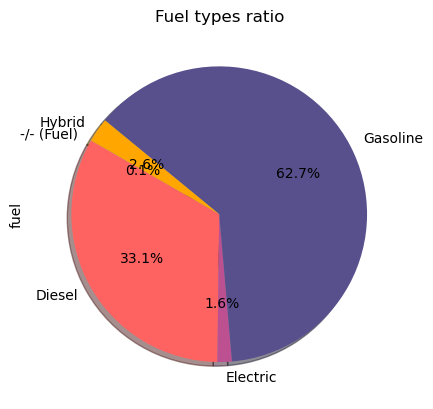

In [295]:
# Create fuel type pie chart

plt.rcParams['font.size'] = 10
pf = import_cars.loc[import_cars['fuel_group'] != 'Gas']
pie_fuel = pf.groupby(['fuel_group']).count()
plot = pie_fuel.plot.pie(y = 'fuel', title="Fuel types ratio", legend=False,
                   autopct='%1.1f%%', colors = ['#ffa600', '#ff6361', '#bc5090', '#58508d'],
                   shadow=True, startangle=150)

Let's investigate offer type column:

In [297]:
import_cars['offerType'].value_counts(normalize=True) * 100


Used             86.46
Pre-registered    5.99
Demonstration     5.10
Employee's car    2.42
New               0.03
Name: offerType, dtype: float64

It is unsurprising that the vast majority of offer types are categorized as 'Used'. To explore the ratio between New and Used cars, we can group the values in the relevant column.

In [299]:
# add 'Pre-registered' 'Demonstration' into 'New'

import_cars['new/used'] = import_cars['offerType']
import_cars['new/used'].replace('Pre-registered', 'New', inplace = True)
import_cars['new/used'].replace('Demonstration', 'New', inplace = True)

# add 'Employee's car' into 'Used'
import_cars['new/used'].replace("Employee's car", 'Used', inplace = True)


In [301]:
import_cars['new/used'].value_counts(normalize=True) * 100



Used   88.88
New    11.12
Name: new/used, dtype: float64

Text(0.5, 1.0, 'Novelty bars')

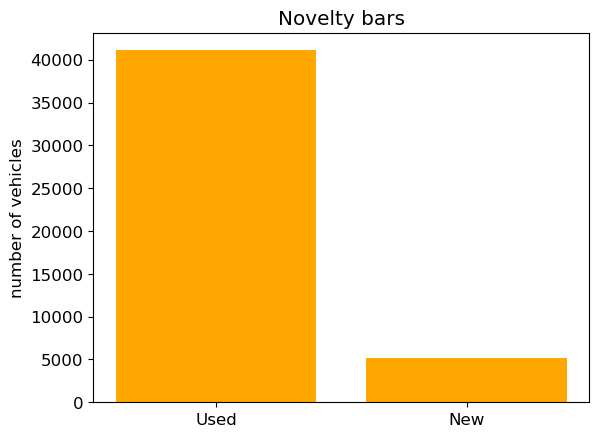

In [305]:
# Create bar chart with ratio of New and Used car offers

plt.rcParams['font.size'] = 12

pyplot.bar(import_cars['new/used'].unique(), import_cars['new/used'].value_counts(), color = '#ffa600')

pyplot.ylabel('number of vehicles')
pyplot.title('Novelty bars')



Statistical analysis:

Now we are going to check some relationships between numeric variables.


In [306]:
import_cars.corr()



,mileage,price,hp
mileage,1.00,-0.30,-0.01
price,-0.30,1.00,0.75
hp,-0.01,0.75,1.00


Looking at the matrix, we can see that:

    The correlation coefficient between mileage and price is -0.30, indicating a weak negative correlation between the two variables. This suggests that as the mileage of a car increases, the price tends to decrease slightly.

    The correlation coefficient between price and hp is 0.75, indicating a strong positive correlation between the two variables. This suggests that as the horsepower of a car increases, the price tends to increase as well.

    The correlation coefficient between mileage and hp is -0.01, indicating a very weak negative correlation between the two variables. This suggests that there is essentially no relationship between the mileage of a car and its horsepower.



In [308]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(import_cars['price'], import_cars['mileage'])
print('The Pearson correlation is', pearson_coef, 'p-value is', p_value)


The Pearson correlation is -0.30290556073430513 p-value is 0.0


In [309]:
pearson_coef1, p_value1 = stats.pearsonr(import_cars['year'], import_cars['mileage'])
print('The Pearson correlation is', pearson_coef1, 'p-value is', p_value1)



The Pearson correlation is -0.6761068197701539 p-value is 0.0


In [313]:
pearson_coef2, p_value2 = stats.pearsonr(import_cars['price'], import_cars['year'])
print('The Pearson correlation is', pearson_coef2, 'p-value is', p_value2)


The Pearson correlation is 0.40595583237406574 p-value is 0.0


In [314]:
gear_test = import_cars[['gear', 'model', 'price']]
pricegear_test = gear_test[['gear', 'price']].groupby(['gear'])

pricegear_test.head(2)



,gear,price
0,Manual,6800
1,Manual,6877
5,Automatic,6950
8,Automatic,6980
901,Semi-automatic,9780
902,Semi-automatic,9780


In [315]:
gear_test



,gear,model,price
0,Manual,316,6800
1,Manual,Golf,6877
2,Manual,Exeo,6900
3,Manual,Megane,6950
4,Manual,308,6950
...,...,...,...
46257,Manual,500,12990
46258,Manual,500,12990
46259,Manual,500,12990
46260,Manual,500,12990


In [316]:
pricegear_test.get_group('Manual')['price']

0         6800
1         6877
2         6900
3         6950
4         6950
         ...  
46257    12990
46258    12990
46259    12990
46260    12990
46261    12990
Name: price, Length: 30492, dtype: int64

The statistical analysis reveals a highly significant correlation between gear type and price, as indicated by the very high F-value and a p-value of less than 0.001.

In [317]:
f_val, p_val = stats.f_oneway(pricegear_test.get_group('Manual')['price'], pricegear_test.get_group('Automatic')['price'])

print('Anova results: f = ', f_val, ', p = ', p_val)

Anova results: f =  10635.900231397447 , p =  0.0


Strong correlation too.

In [318]:
f_val, p_val = stats.f_oneway(pricegear_test.get_group('Manual')['price'], pricegear_test.get_group('Semi-automatic')['price'])

print('Anova results: f = ', f_val, ', p = ', p_val)


Anova results: f =  5.703817139510052 , p =  0.016934095527232778


F-value is not high, p > 0.001. No strong correlation.


In [319]:
f_val, p_val = stats.f_oneway(pricegear_test.get_group('Automatic')['price'], pricegear_test.get_group('Semi-automatic')['price'])

print('Anova results: f = ', f_val, ', p = ', p_val)


Anova results: f =  27.278758841863247 , p =  1.7837561625754947e-07


Here we can see correlation to. We can note that 'Manual' and 'Semi-autmatic' gear types are not strongly correlated with one another.

<AxesSubplot:xlabel='hp', ylabel='price'>

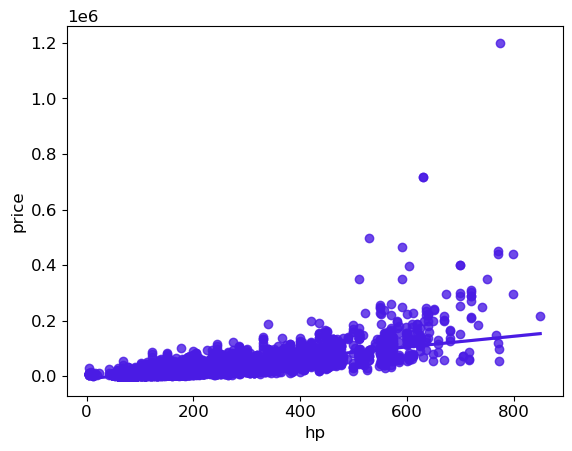

In [337]:
sns.regplot(x='hp', y='price', data=import_cars, color='#4a1be4')


<AxesSubplot:xlabel='hp', ylabel='price'>

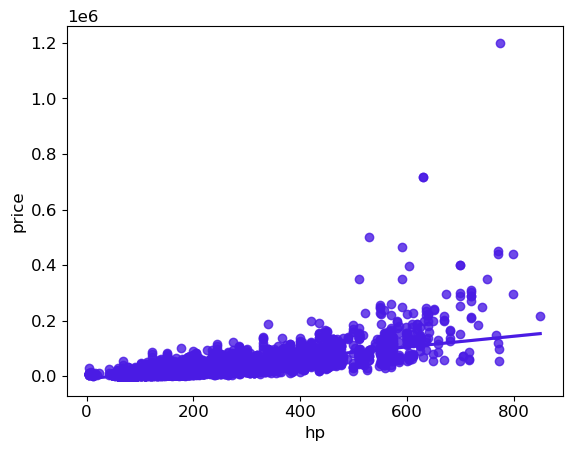

In [341]:
sns.regplot(x='hp', y = 'price', data = import_cars, color = '#4a1be4')



The horsepower and price variables are positively correlated with a correlation coefficient of 0.75. Additionally, it appears that there may be price outliers for cars with horsepower values exceeding 450.

Moving on, we will explore the representation of fuel types in cars manufactured during different years.

With this in mind, we will continue our analysis and visualizations.

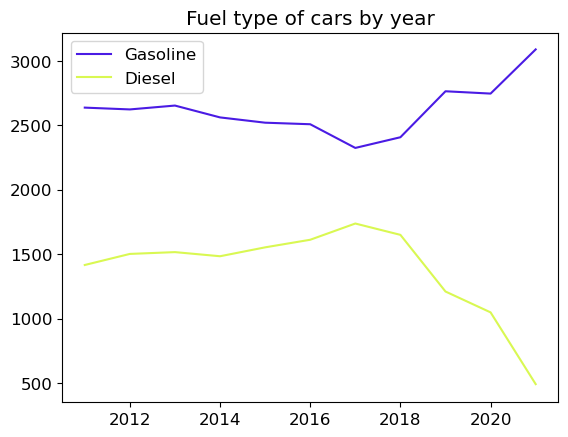

In [357]:
import matplotlib.pyplot as plt

fuel_count = import_cars.groupby(['year', 'fuel_group'], as_index=False).count()
gasoline = fuel_count[fuel_count['fuel_group'] == 'Gasoline']
diesel = fuel_count[fuel_count['fuel_group'] == 'Diesel']
hybrid = fuel_count[fuel_count['fuel_group'] == 'Hybrid']
gas = fuel_count[fuel_count['fuel_group'] == 'Gas']
electric = fuel_count[fuel_count['fuel_group'] == 'Electric']

fig, ax = plt.subplots()
ax.plot(gasoline['year'], gasoline['make'], label='Gasoline', color='#4a1be4')
ax.plot(diesel['year'], diesel['make'], label='Diesel', color='#d9f852')
ax.legend()
ax.set_title('Fuel type of cars by year')
ax.set_ylim(350,)
plt.show()


(0.0, 435.55)

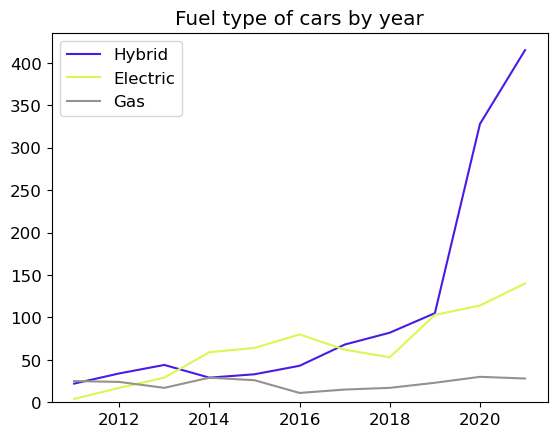

In [358]:
plt.plot(hybrid['year'], hybrid['make'], label = 'Hybrid', color = '#4a1be4')
plt.plot(electric['year'], electric['make'], label = 'Electric', color = '#d9f852')
plt.plot(gas['year'], gas['make'], label = 'Gas', color = '#95928c')
plt.legend()
plt.title('Fuel type of cars by year') 
plt.ylim(0,)


In 2017, the quantity of diesel cars being sold on AutoScaut2024 was the highest, while the number of gasoline cars was at its lowest. The line chart representing the number of gasoline cars shows a downward trend until 2017, followed by an upward trend from 2017 to 2021. Conversely, the line chart representing the number of diesel cars displays an upward trend until 2017, but then experiences a significant decrease between 2017 and 2021. In fact, the number of diesel cars produced in 2021 is expected to be four times less than those produced in 2017. On the other hand, the quantity of electric and hybrid vehicles being manufactured is increasing with each passing year. Gas cars are scarce, and their trend is flat, with no significant increase or decrease in their quantity over the production years.

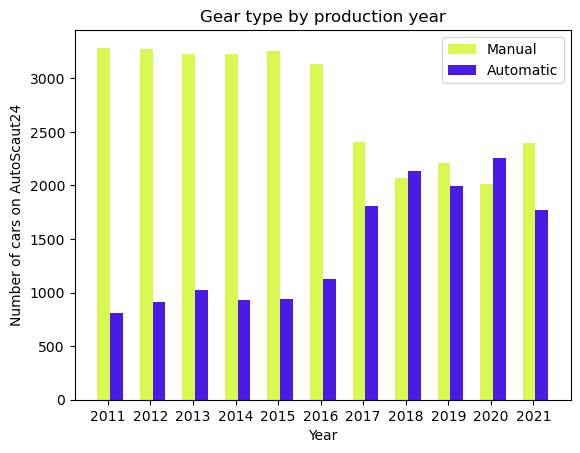

In [360]:
plt.rcParams['font.size'] = 10
gear_count = import_cars.groupby(['year', 'gear'], as_index = False).count()
X = gear_count['year'].unique()
manual = gear_count[(gear_count['gear'] == 'Manual')]
automatic = gear_count[(gear_count['gear'] == 'Automatic')]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, manual['make'], 0.3, label = 'Manual', color = '#d9f852')
plt.bar(X_axis + 0.2, automatic['make'], 0.3, label = 'Automatic', color = '#4a1be4')
  
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Number of cars on AutoScaut24")
plt.title("Gear type by production year")
plt.legend()
plt.show()

The distribution of gear types varies significantly depending on the production year of the cars. Cars produced before 2017 are more likely to have manual gear types, while cars produced after 2017 have almost an equal distribution of gear types. The proportion of automatic gear types was higher in 2018 and 2020. Semi-automatic cars were excluded from the chart due to their low representation.

(0.0, 456.75)

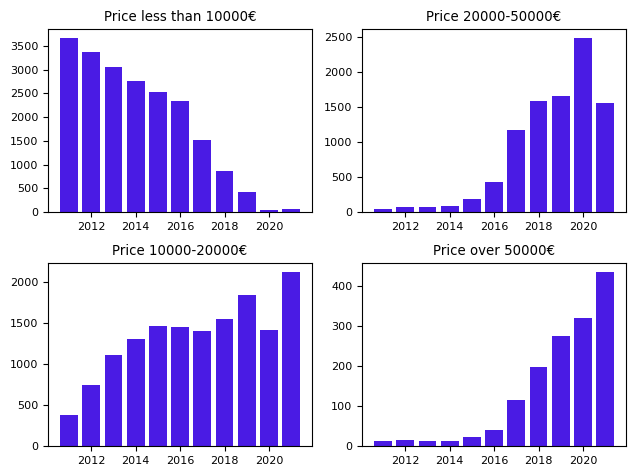

In [362]:
#Create bars that show how price groups are represented by production year

plt.rcParams['font.size'] = 8

import matplotlib.pyplot as plt
import numpy as np

price_bin_year = import_cars.groupby(['price-bin', 'year'], as_index = False).count()
bin1 = price_bin_year[(price_bin_year['price-bin'] == '< 10000€')]
bin2 = price_bin_year[(price_bin_year['price-bin'] == '10000-20000€')]
bin3 = price_bin_year[(price_bin_year['price-bin'] == '20000-50000€')]
bin4 = price_bin_year[(price_bin_year['price-bin'] == '50000€ +')]

fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(bin1['year'], bin1['make'], label = '< 10000€', color = '#4a1be4')
axs[0, 0].set_title('Price less than 10000€')
axs[1, 0].bar(bin2['year'], bin2['make'], label = '10000-20000€', color = '#4a1be4')
axs[1, 0].set_title('Price 10000-20000€')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(bin3['year'], bin3['make'], label = '20000-50000€', color = '#4a1be4')
axs[0, 1].set_title('Price 20000-50000€')
axs[1, 1].bar(bin4['year'], bin4['make'], label = '50000€ +', color = '#4a1be4')
axs[1, 1].set_title('Price over 50000€')
fig.tight_layout()
plt.ylim(0,)

Cars with prices lower than 10,000 euros tend to be less represented when production year increases. And reverce when the price exceeds 10000€.

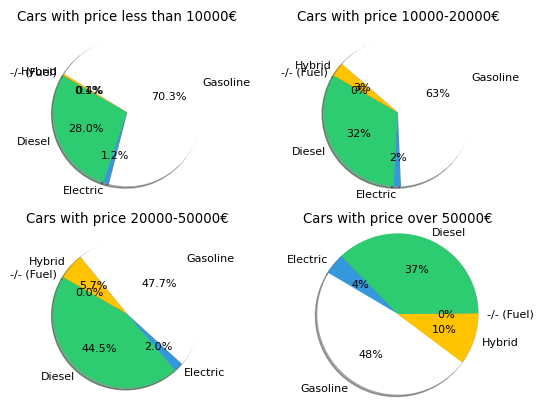

In [365]:
plt.rcParams['font.size'] = 8
fuel_ng =import_cars.loc[import_cars['fuel_group'] != 'Gas']
price_bin_fuel = fuel_ng.groupby(['price-bin', 'fuel_group'], as_index = False).count()
bin12 = price_bin_fuel[(price_bin_fuel['price-bin'] == '< 10000€')]
bin22 = price_bin_fuel[(price_bin_fuel['price-bin'] == '10000-20000€')]
bin32 = price_bin_fuel[(price_bin_fuel['price-bin'] == '20000-50000€')]
bin42 = price_bin_fuel[(price_bin_fuel['price-bin'] == '50000€ +')]

fig1, axs1 = plt.subplots(2, 2)
axs1[0, 0].pie(bin12['make'], labels = bin12['fuel_group'], autopct='%1.1f%%', colors = ['#FFC300', '#2ECC71', '#3498DB' , '#ffffff'], shadow=True, startangle=150, radius=1.1)
axs1[0, 0].set_title('Cars with price less than 10000€')
axs1[0, 1].pie(bin22['make'], labels=bin22['fuel_group'], autopct='%.0f%%', colors = ['#FFC300', '#2ECC71', '#3498DB' , '#ffffff'],shadow=True, startangle=150, radius=1.1)
axs1[0, 1].set_title('Cars with price 10000-20000€')
axs1[1, 0].pie(bin32['make'], labels=bin32['fuel_group'], autopct='%1.1f%%', colors = ['#FFC300', '#2ECC71', '#3498DB' , '#ffffff'],shadow=True, startangle=150, radius=1.1)
axs1[1, 0].set_title('Cars with price 20000-50000€')
axs1[1, 1].pie(bin42['make'], labels=bin42['fuel_group'], autopct='%.0f%%', colors = ['#FFC300', '#2ECC71', '#3498DB' , '#ffffff'], shadow=True,  radius=1.2)
axs1[1, 1].set_title('Cars with price over 50000€')
plt.show()


The majority (70.4%) of cars priced below 10000 euros are gasoline-powered. However, the proportion of gasoline cars decreases significantly (7.4%) in the next price group and falls below 50% in the two higher-priced groups. On the other hand, other fuel types are more prevalent in the higher price groups.

(0.0, 15128.65)

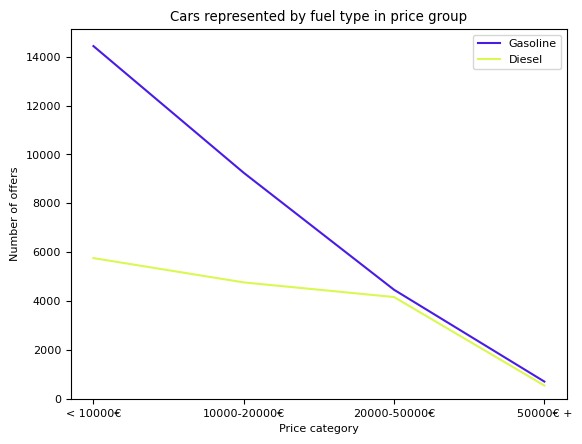

In [366]:
fuel_count1 = import_cars.groupby(['price-bin', 'fuel_group'], as_index = False).count()
fuel_count
gasoline = fuel_count1[(fuel_count1['fuel_group'] == 'Gasoline')]
diesel = fuel_count1[(fuel_count1['fuel_group'] == 'Diesel')]
hybrid = fuel_count1[(fuel_count1['fuel_group'] == 'Hybrid')]
gas = fuel_count1[(fuel_count1['fuel_group'] == 'Gas')]
electric = fuel_count1[(fuel_count1['fuel_group'] == 'Electric')]

plt.plot(gasoline['price-bin'], gasoline['make'], label = 'Gasoline', color = '#4a1be4')
plt.plot(diesel['price-bin'], diesel['make'], label = 'Diesel', color = '#d9f852')
plt.legend()
plt.title('Cars represented by fuel type in price group') 
plt.ylabel('Number of offers')
plt.xlabel('Price category')
plt.ylim(0,)

(0.0, 560.6)

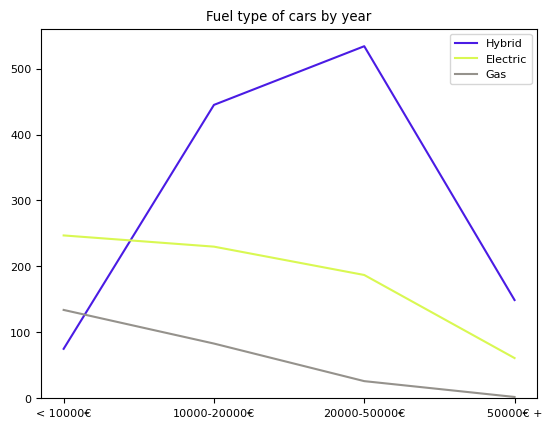

In [367]:
plt.plot(hybrid['price-bin'], hybrid['make'], label = 'Hybrid', color = '#4a1be4')
plt.plot(electric['price-bin'], electric['make'], label = 'Electric', color = '#d9f852')
plt.plot(gas['price-bin'], gas['make'], label = 'Gas', color = '#95928c')
plt.legend()
plt.title('Fuel type of cars by year') 
plt.ylim(0,)

As the price of cars increases, most fuel types, except for hybrid, tend to be less represented in the overall population of cars.

(0.0, 1479.45)

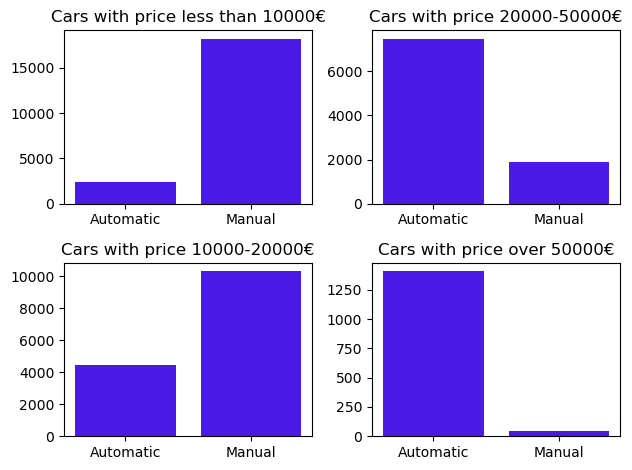

In [369]:
#Create bar charts, that show how gear type 'Manual' and 'Automatic' represented in price groups 

plt.rcParams['font.size'] = 10

import matplotlib.pyplot as plt
import numpy as np

cars_ma = import_cars.loc[import_cars['gear'] != 'Semi-automatic']
price_bin_year1 = cars_ma.groupby(['price-bin', 'gear'], as_index = False).count()
bin11 = price_bin_year1[(price_bin_year1['price-bin'] == '< 10000€')]
bin21 = price_bin_year1[(price_bin_year1['price-bin'] == '10000-20000€')]
bin31 = price_bin_year1[(price_bin_year1['price-bin'] == '20000-50000€')]
bin41 = price_bin_year1[(price_bin_year1['price-bin'] == '50000€ +')]

fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(bin11['gear'], bin11['make'], label = '< 10000€', color = '#4a1be4')
axs[0, 0].set_title('Cars with price less than 10000€')
axs[1, 0].bar(bin21['gear'], bin21['make'], label = '10000-20000€', color = '#4a1be4')
axs[1, 0].set_title('Cars with price 10000-20000€')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(bin31['gear'], bin31['make'], label = '20000-50000€', color = '#4a1be4')
axs[0, 1].set_title('Cars with price 20000-50000€')
axs[1, 1].bar(bin41['gear'], bin41['make'], label = '50000€ +', color = '#4a1be4')
axs[1, 1].set_title('Cars with price over 50000€')
fig.tight_layout()
plt.ylim(0,)

We observe a trend where cars priced below 20,000 euros tend to have manual gear types more frequently, while those priced at or above 20,000 euros are less likely to have manual gears and more likely to have automatic transmission. In fact, as the price increases, the likelihood of a car having manual gears decreases and the likelihood of it having automatic transmission increases.

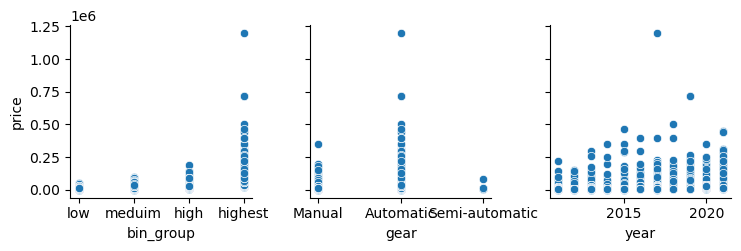

In [388]:
x_vars = import_cars.loc[:, ['bin_group', 'gear', 'year']]
y_vars = ['price']

sns.pairplot(data=import_cars, x_vars=x_vars, y_vars=y_vars)


(0.0, 50.4)

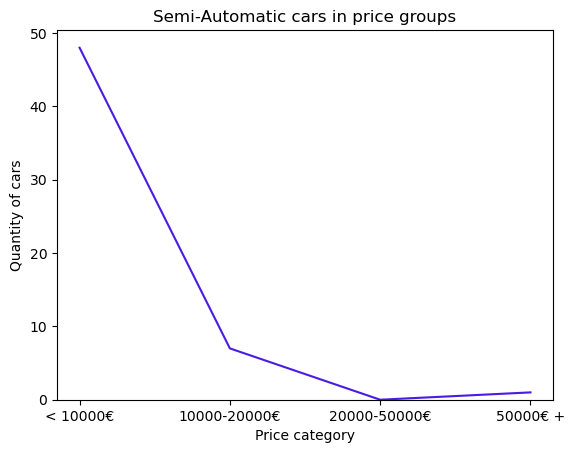

In [370]:
# Create bar charts, that show how gear type 'Semi-automatic' represented in price groups 

cars_sa = import_cars.loc[import_cars['gear'] == 'Semi-automatic']
price_bin_year12 = cars_sa.groupby(['price-bin', 'gear'], as_index = False).count()

pyplot.plot(price_bin_year12['price-bin'], price_bin_year12['make'], color = '#4a1be4')

pyplot.xlabel('Price category')
pyplot.ylabel('Quantity of cars')
pyplot.title('Semi-Automatic cars in price groups')
plt.ylim(0,)


Most of all cars, that have Semi-automatic gear are in 1st price group(under 10000€)

<b>Generating top or stats information: </b>

In [371]:
# Add columns with value_counts of model and make to dataframe

import_cars['model_available'] = import_cars['model'].map(import_cars['model'].value_counts())
import_cars['make_count'] = import_cars['make'].map(import_cars['make'].value_counts())
import_cars

,mileage,make,model,fuel,gear,offerType,price,hp,year,hp-bin,hp_bin,bin_group,price-bin,fuel_group,new/used,model_available,make_count
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00,2011,meduim,100-200 hp,meduim,< 10000€,Diesel,Used,49,2400
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00,2011,meduim,100-200 hp,meduim,< 10000€,Gasoline,Used,1492,6921
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00,2011,meduim,100-200 hp,meduim,< 10000€,Gasoline,Used,15,1924
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00,2011,meduim,100-200 hp,meduim,< 10000€,Gasoline,Used,389,2828
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00,2011,meduim,100-200 hp,meduim,< 10000€,Gasoline,Used,179,1232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46257,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,low,5-100 hp,low,10000-20000€,Hybrid,New,666,1700
46258,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,low,5-100 hp,low,10000-20000€,Hybrid,New,666,1700
46259,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,low,5-100 hp,low,10000-20000€,Hybrid,New,666,1700
46260,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021,low,5-100 hp,low,10000-20000€,Hybrid,New,666,1700


In [372]:


# Find out top 10 of models, which are most represented

model_avg =import_cars[['make', 'model','price', 'model_available', 'mileage']]
model_avg = model_avg.groupby(['make', 'model'], as_index = False).mean()
model_avg = model_avg.sort_values(by = 'model_available', ascending = False) 
top10_models = model_avg.head(10)
top10_models.reset_index(drop = True, inplace = True)
top10_models



,make,model,price,model_available,mileage
0,Volkswagen,Golf,13540.55,1492.00,91738.14
1,Opel,Corsa,8959.63,1491.00,55012.01
2,Ford,Fiesta,9864.22,1289.00,52437.59
3,Opel,Astra,9574.46,1191.00,101118.97
4,Ford,Focus,12428.89,985.00,83752.35
5,Volkswagen,up!,7622.25,945.00,55040.93
6,Skoda,Fabia,10170.06,917.00,55746.15
7,Volkswagen,Polo,10053.58,893.00,68183.68
8,smart,forTwo,7878.90,725.00,55304.53
9,Fiat,500,11022.25,666.00,25588.98


And now we are going to check models, that are represented just once on AutoS

In [374]:
rare_models = import_cars.loc[import_cars['model_available'] == 1]
rare_models[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
762,Mercedes-Benz,GLS 500,86885,455.00,2267
3401,Chrysler,Grand Voyager,9999,287.00,145000
3630,Volkswagen,Cross Golf,9900,160.00,87000
4567,Mercedes-Benz,SLC 200,36950,184.00,44000
5080,Dodge,Nitro,9700,260.00,107130
...,...,...,...,...,...
45603,Mercedes-Benz,S 260,134999,330.00,15
45985,Kia,e-Niro,37480,204.00,35
46102,Alpine,A110,74990,292.00,3112
46183,BMW,iX3,58000,286.00,45


In [375]:
#Find out top 10 of makes, which are more represented and average stats

make_avg = import_cars[['make', 'model','price', 'make_count', 'mileage']]
make_avg = make_avg.groupby(['make'], as_index = False).mean()
make_avg = make_avg.sort_values(by = 'make_count', ascending = False) 
top10_make = make_avg.head(10)
top10_make.reset_index(drop = True, inplace = True)
top10_make


,make,price,make_count,mileage
0,Volkswagen,16060.09,6921.00,80881.04
1,Opel,10428.03,4801.00,78416.94
2,Ford,13793.37,4441.00,69201.89
3,Skoda,13715.19,2877.00,70644.23
4,Renault,11287.90,2828.00,57111.05
5,Audi,30000.23,2681.00,76796.27
6,BMW,23431.07,2400.00,97489.55
7,Mercedes-Benz,28379.92,2347.00,96164.90
8,SEAT,12847.43,1924.00,66158.88
9,Hyundai,12852.69,1886.00,52792.60


In [378]:
# Find out rare make of cars

rare10_make = import_cars.loc[import_cars['make_count'] == 1]
rare10_make.reset_index(drop = True, inplace = True)
rare10_make[['make', 'model', 'price', 'hp', 'mileage', 'make_count']]



,make,model,price,hp,mileage,make_count
0,Zhidou,D2S,12500,24.00,3000,1
1,Tazzari,EV Zero Classic,6500,20.00,38000,1
2,Trucks-Lkw,Ford,8200,131.00,312000,1
3,Brilliance,BS4,1500,101.00,100524,1
4,FISKER,Karma,69900,408.00,7500,1
5,Others,Landwind,1850,97.00,1,1
6,Isuzu,D-Max,16900,163.00,56000,1
7,Caravans-Wohnm,Adria,24500,132.99,2000,1
8,Alpine,A110,74990,292.00,3112,1


In [379]:
# Top 10 most expensive cars represented on AutoScout24

cars_sorted = import_cars.sort_values(by = 'price', ascending = False)
top10_expensive = cars_sorted.head(10)
top10_expensive.reset_index(drop = True, inplace = True)
top10_expensive[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
0,Ferrari,F12,1199900,775.00,431
1,Mercedes-Benz,S 650,717078,630.00,90
2,Maybach,Pullman,717078,630.00,90
3,Maybach,Pullman,499800,530.00,3400
4,Mercedes-Benz,SLS,465000,591.00,350
5,Lamborghini,Aventador,449900,770.00,3600
6,Ferrari,812,439900,799.00,6500
7,Lamborghini,Aventador,439900,770.00,14090
8,Lamborghini,Aventador,399999,700.00,1200
9,Porsche,991,399911,700.00,4624


In [380]:
# Top 10 cheapest cars represented on AutoS

top10_cheapest = cars_sorted.tail(10)
top10_cheapest = top10_cheapest.sort_values(by = 'price', ascending = True)
top10_cheapest.reset_index(drop = True, inplace = True)
top10_cheapest[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
0,Citroen,C1,1100,68.00,204000
1,Lada,Priora,1190,98.00,100611
2,Toyota,Aygo,1250,68.00,153000
3,Peugeot,206,1299,68.00,222000
4,Opel,Corsa,1300,69.00,133000
5,Volkswagen,Touran,1396,140.00,233567
6,Brilliance,BS4,1500,101.00,100524
7,SEAT,Ibiza,1500,69.00,170000
8,smart,forTwo,1500,54.00,140000
9,Fiat,Panda,1500,69.00,157000


In [382]:
cars_sorted_hp = import_cars.sort_values(by = 'hp', ascending = False)
top10hp = cars_sorted_hp.head(10)
top10hp = top10hp.reset_index()
top10hp[['make', 'model', 'price', 'hp', 'mileage']]

,make,model,price,hp,mileage
0,Mercedes-Benz,G 63 AMG,216619,850.00,9234
1,Audi,R8,295000,799.00,11000
2,Ferrari,812,439900,799.00,6500
3,Ferrari,F12,1199900,775.00,431
4,Tesla,Model S,54450,772.00,71099
5,Tesla,Model X,99999,772.00,63205
6,Ford,Mustang,121000,771.00,50
7,Lamborghini,Aventador,439900,770.00,14090
8,Lamborghini,Aventador,449900,770.00,3600
9,Corvette,Z06,148600,767.00,9790


In [384]:
c = import_cars.loc[import_cars['hp'] <= 20]
c['model'].unique()



array(['Due', 'Twizy', 'JS 50', 'City', 'Ape', 'M.Go', 'EV Zero Classic',
       'M8', 'Kona', 'Birò'], dtype=object)

In [385]:
hp_avg = import_cars[['make', 'model','price', 'hp', 'model_available', 'mileage']]
hp_avg = hp_avg.groupby(['make', 'model'], as_index = False).mean()
hp_avg = hp_avg.sort_values(by = 'hp', ascending = True) 
bot10_hp = hp_avg.head(10)
bot10_hp.reset_index(drop = True, inplace = True)
bot10_hp


,make,model,price,hp,model_available,mileage
0,Ligier,JS 50,9570.00,5.00,5.00,30447.40
1,Estrima,Birò,13090.00,5.00,2.00,225.00
2,Microcar,M.Go,8262.86,5.86,7.00,30994.71
3,Microcar,M8,6149.50,6.00,7.00,32283.00
4,Aixam,City,12935.00,6.50,2.00,602.50
5,Microcar,Due,6745.00,7.50,2.00,37650.00
6,Piaggio,Ape,7849.75,10.25,4.00,16125.00
7,Renault,Twizy,5413.43,10.74,23.00,23813.43
8,Tazzari,EV Zero Classic,6500.00,20.00,1.00,38000.00
9,Zhidou,D2S,12500.00,24.00,1.00,3000.00


I have performed a preliminary analysis of a dataset comprising car information listed on Automobile  and have discovered some valuable insights. 

In [390]:
### check the multicolinearity
def heatmap(dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()


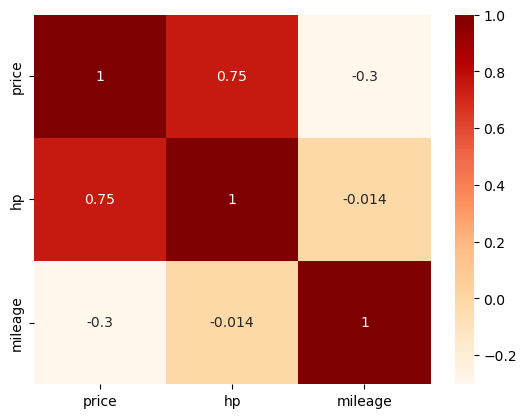

In [391]:
dimension_col_list = ['price', 'hp', 'mileage','gear']
heatmap(import_cars.filter(dimension_col_list)) 

In [ ]:
# Thank you